<a href="https://colab.research.google.com/github/20NN1A05F5/SOC_V/blob/main/10_Regularization_on_Multiclass_classification_using_Reuters_Newswire_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from keras.datasets import reuters

In [ ]:
(train_X, train_Y), (test_X, test_Y) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
from keras.utils import to_categorical
def OneHotEncoding_fn(ReutersData, dimension=10000):
  OneHotEncoded_Data = np.zeros((len(ReutersData), dimension))
  for i, sequence in enumerate(ReutersData):
      OneHotEncoded_Data[i, sequence] = 1.
  return OneHotEncoded_Data
x_train = OneHotEncoding_fn(train_X)
x_test = OneHotEncoding_fn(test_X)

y_train = to_categorical(train_Y)
y_test = to_categorical(test_Y)

In [ ]:
from keras import models
from keras import layers
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01), activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
from keras import optimizers
from keras import losses
from keras import metrics
X_validation = x_train[:800]
X_train_without_val = x_train[800:]
y_validation = y_train[:800]
y_train_without_val = y_train[800:]
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001, rho=0.9),
             loss=losses.categorical_crossentropy,
             metrics=[metrics.categorical_accuracy])
history = model.fit(X_train_without_val,
                    y_train_without_val,
                    epochs=25,
                    batch_size=512,
                    validation_data=(X_validation,y_validation))

Epoch 1/25
16/16 [==============================] - 2s 86ms/step - loss: 7.2071 - categorical_accuracy: 0.4677 - val_loss: 3.7229 - val_categorical_accuracy: 0.5462
Epoch 2/25
16/16 [==============================] - 1s 64ms/step - loss: 3.4018 - categorical_accuracy: 0.5406 - val_loss: 3.1130 - val_categorical_accuracy: 0.5600
Epoch 3/25
16/16 [==============================] - 1s 65ms/step - loss: 3.0473 - categorical_accuracy: 0.5917 - val_loss: 2.8763 - val_categorical_accuracy: 0.6175
Epoch 4/25
16/16 [==============================] - 1s 77ms/step - loss: 2.8524 - categorical_accuracy: 0.6404 - val_loss: 2.7291 - val_categorical_accuracy: 0.6450
Epoch 5/25
16/16 [==============================] - 1s 92ms/step - loss: 2.7029 - categorical_accuracy: 0.6594 - val_loss: 2.6082 - val_categorical_accuracy: 0.6575
Epoch 6/25
16/16 [==============================] - 1s 64ms/step - loss: 2.5892 - categorical_accuracy: 0.6649 - val_loss: 2.4902 - val_categorical_accuracy: 0.6787
Epoch 7/25

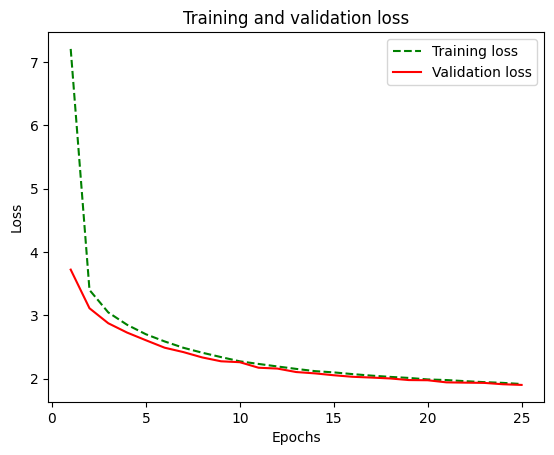

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

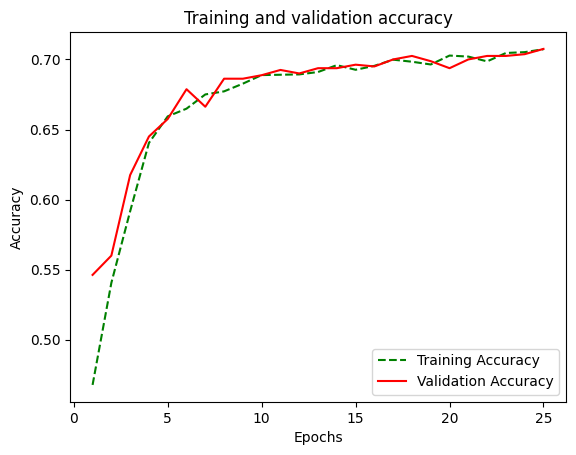

In [ ]:
plt.clf()
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']
plt.plot(epochs, acc_values, 'g--', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
